In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr, shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
url= 'url=https://drive.google.com/file/d/1ubaKHOmsSIfQ0fch3SKN3l4cLaY2oqam/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df= pd.read_csv(url)
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [3]:
df.dropna(inplace=True)
df.drop(columns = ['Gender','Device Model','Operating System','Age','User ID'], inplace = True)
df

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),User Behavior Class
0,393,6.4,1872,67,1122,4
1,268,4.7,1331,42,944,3
2,154,4.0,761,32,322,2
3,239,4.8,1676,56,871,3
4,187,4.3,1367,58,988,3
...,...,...,...,...,...,...
695,92,3.9,1082,26,381,2
696,316,6.8,1965,68,1201,4
697,99,3.1,942,22,457,2
698,62,1.7,431,13,224,1


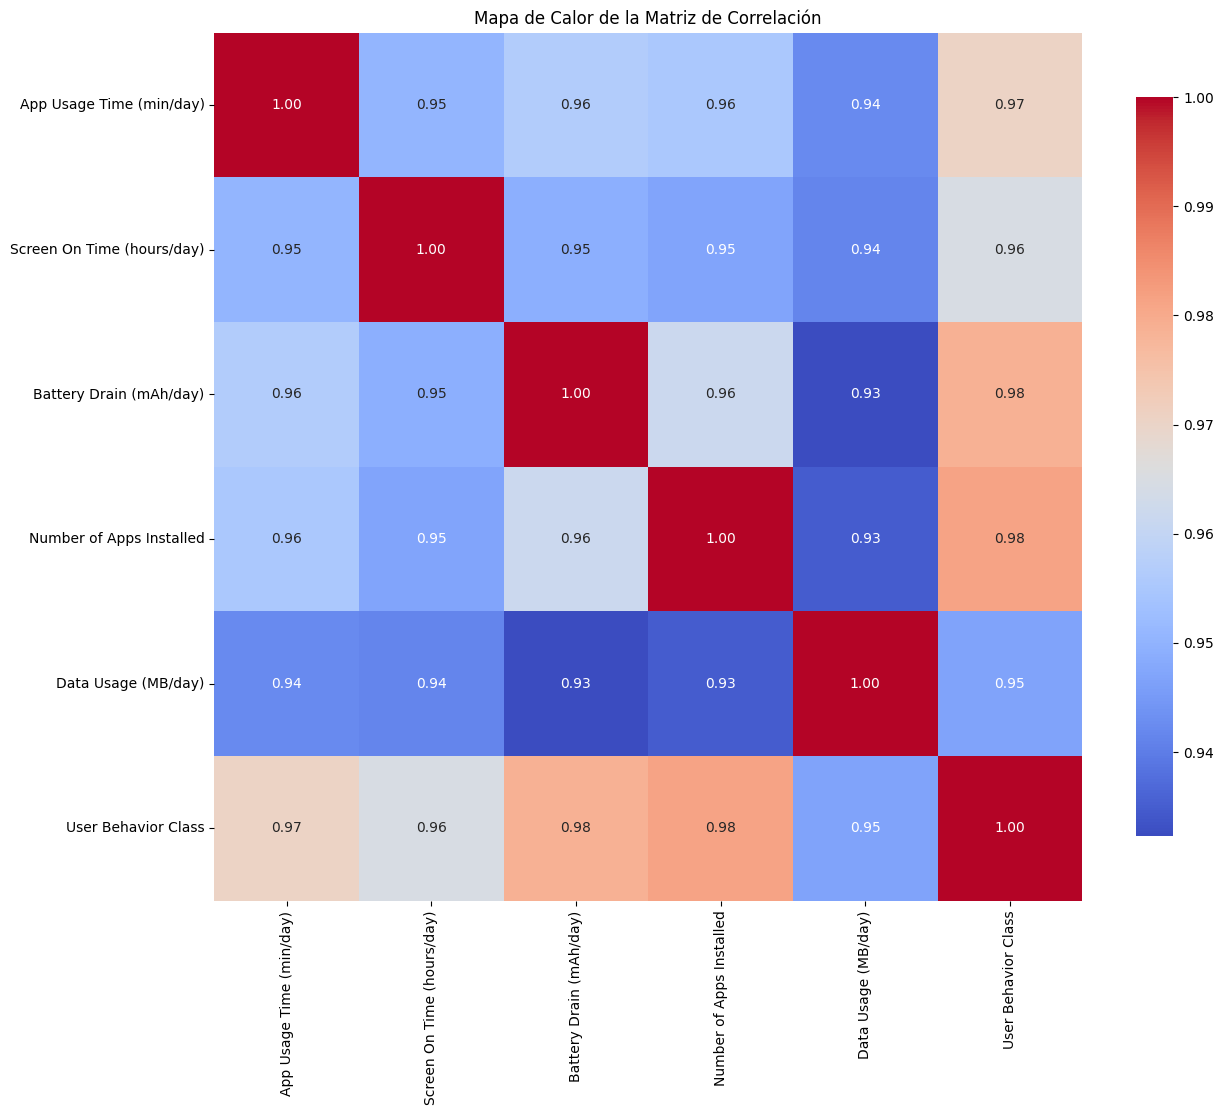

In [4]:
correlation_matrix= df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [5]:
print(df.columns)

Index(['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'User Behavior Class'],
      dtype='object')


In [6]:
df=df[['App Usage Time (min/day)','Data Usage (MB/day)','Battery Drain (mAh/day)','Number of Apps Installed']]

df

,App Usage Time (min/day),Data Usage (MB/day),Battery Drain (mAh/day),Number of Apps Installed
0,393,1122,1872,67
1,268,944,1331,42
2,154,322,761,32
3,239,871,1676,56
4,187,988,1367,58
...,...,...,...,...
695,92,381,1082,26
696,316,1201,1965,68
697,99,457,942,22
698,62,224,431,13


In [7]:
#Dividir los datos en conjuntos de entrenamiento y prueba
#               X1                             X2                        x3
x= df[['Data Usage (MB/day)','App Usage Time (min/day)','Number of Apps Installed']]
y= df['Battery Drain (mAh/day)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42) #Un grupo para entrenar al modelo y el otro para comprobarlo

modelo= LinearRegression()
modelo.fit(x,y)
y_pred=modelo.predict(x_test)

bs= modelo.coef_
b0= modelo.intercept_
print(bs)
print(b0)
print(f'modelo de regresion lineal: y={bs[0]:0.3f}x1+{bs[1]:0.3f}x2+{bs[2]:0.3f}x3+{b0:0.3f}')
print('\n')


[ 0.1554188   1.6683654  15.30753812]
152.5096261933702
modelo de regresion lineal: y=0.155x1+1.668x2+15.308x3+152.510




In [8]:
#Coeficiente de Correlación y Determinación
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print('\n')
print(f'Error Cuadratico Medio: {mse:0.4}')
print(f'R2: {r2:0.4f}')



Error Cuadratico Medio: 3.825e+04
R2: 0.9430


In [9]:
#Modelo Matematico
modelo_escrito= '+'.join([f'{bs[i-1]: 0.2f} x{1}' for i in range(1, len(bs)+1)]) +f'{b0:0.2f}'
print(f'Ecuacion del modelo:{modelo_escrito}')

residuales= y_test- y_pred


Ecuacion del modelo: 0.16 x1+ 1.67 x1+ 15.31 x1152.51


In [10]:
#Test de Shapiro
test_de_shapiro = shapiro(residuales)
print(f'Estadistico de Shapiro-wiki: {test_de_shapiro.statistic:0.4f}')
print(f'p-valor de shapiro-wilk:{test_de_shapiro.pvalue: 0.4f}')

Estadistico de Shapiro-wiki: 0.9891
p-valor de shapiro-wilk: 0.0100


In [11]:
#Interpretación
if test_de_shapiro.pvalue > 0.10:
    print('Los residuales siguen una distribucion normal.')
else:
    print('Los residuales no siguen una distribucion normal.')


Los residuales no siguen una distribucion normal.


In [12]:
#Test de Breusch-Pagan
exog = sm.add_constant(x_test)
bp_test = het_breuschpagan(residuales, exog)
print(f'Estadistico de Breusch-Pagan: {bp_test[0]: 0.4f}')
print(f'p-valor de Breusch-Pagan: {bp_test[1]: 0.4f}')

print('\n')


Estadistico de Breusch-Pagan:  19.9318
p-valor de Breusch-Pagan:  0.0002




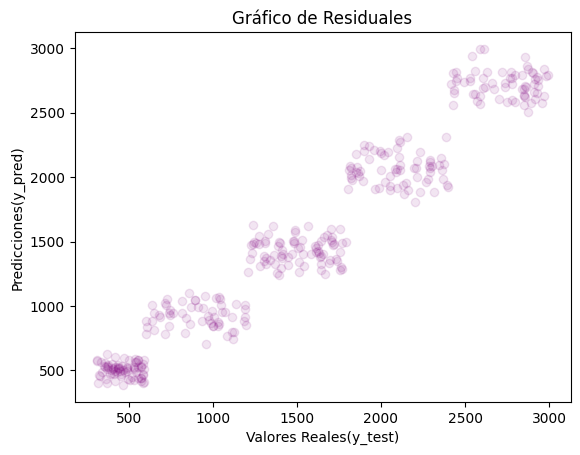

In [13]:
#Grafico de residuales
plt.figure()
plt.scatter(y_test, y_pred, color= 'purple', alpha= 0.1)
plt.xlabel('Valores Reales(y_test)')
plt.ylabel('Predicciones(y_pred)')
plt.title('Gráfico de Residuales')
plt.show()

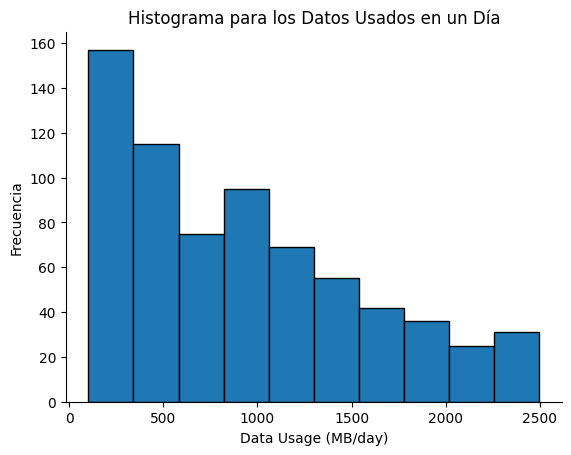

In [14]:
# Crear el histograma
plt.figure()
plt.hist(df['Data Usage (MB/day)'], edgecolor='black')

# Agregar títulos y etiquetas
plt.title('Histograma para los Datos Usados en un Día')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frecuencia')

# Quitar las líneas superior y derecha del marco
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False) # superior

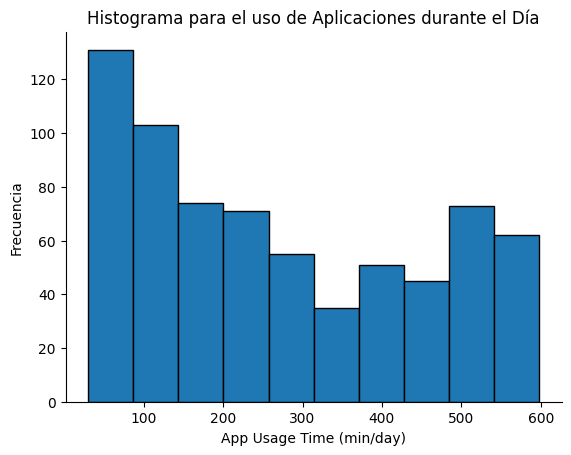

In [15]:
# Crear el histograma
plt.figure()
plt.hist(df['App Usage Time (min/day)'], edgecolor='black')

# Agregar títulos y etiquetas
plt.title('Histograma para el uso de Aplicaciones durante el Día')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frecuencia')

# Quitar las líneas superior y derecha del marco
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False) # superior

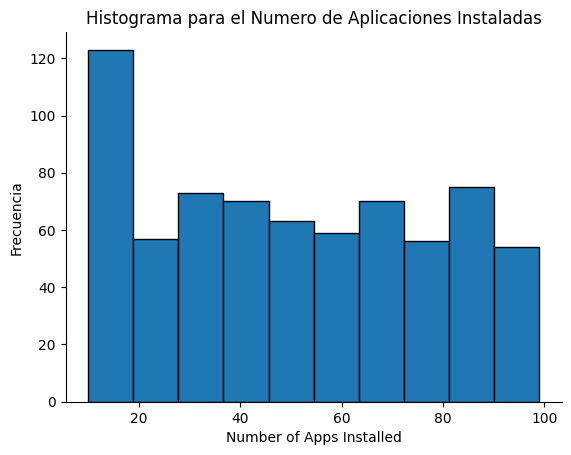

In [16]:
# Crear el histograma
plt.figure()
plt.hist(df['Number of Apps Installed'], edgecolor='black')

# Agregar títulos y etiquetas
plt.title('Histograma para el Numero de Aplicaciones Instaladas')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Frecuencia')

# Quitar las líneas superior y derecha del marco
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False) # superior

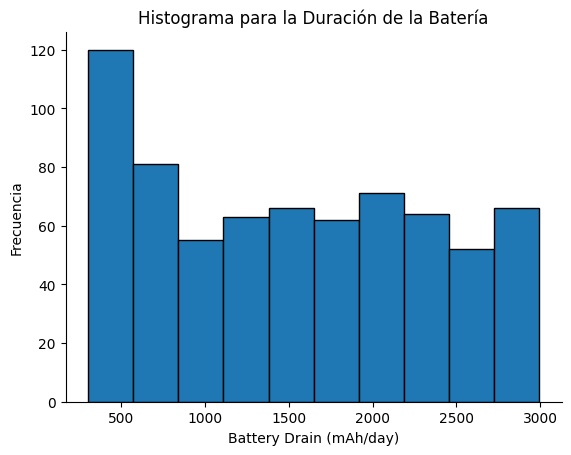

In [17]:
# Crear el histograma
plt.figure()
plt.hist(df['Battery Drain (mAh/day)'], edgecolor='black')

# Agregar títulos y etiquetas
plt.title('Histograma para la Duración de la Batería')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Frecuencia')

# Quitar las líneas superior y derecha del marco
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False) # superior

In [18]:
# Calcular el modelo de regresión ajustada
from sklearn.linear_model import LinearRegression

X = df[['Data Usage (MB/day)','App Usage Time (min/day)','Number of Apps Installed']]
Y = df['Battery Drain (mAh/day)']

modelo = LinearRegression()
modelo.fit(X, Y)

bs = modelo.coef_
b0 = modelo.intercept_

modelo_escrito = ' + '.join([f'{bs[i-1]: 0.2f} x{i}' for i in range(1, len(bs)+1)]) + f' + {b0: 0.2f}'

print(f'Ecuación del modelo: {modelo_escrito}')

Ecuación del modelo:  0.16 x1 +  1.67 x2 +  15.31 x3 +  152.51


In [19]:
#Coeficiente de Determinación
y_pred = modelo.predict(X)

r2 = r2_score(Y, y_pred)

print(f"R²: {r2: 0.4f}")

R²:  0.9427


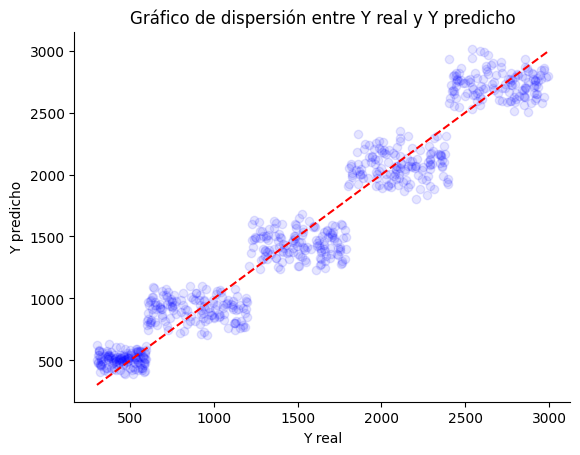

In [20]:
#Linealidad
plt.figure()  # Crear una nueva figura
plt.scatter(Y, y_pred, color='blue', alpha = 0.1)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='--')
plt.xlabel('Y real')
plt.ylabel('Y predicho')
plt.title('Gráfico de dispersión entre Y real y Y predicho')

# Quitar las líneas superior y derecha del marco
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False) # superior

In [21]:
#Normalidad
# Calcular el test de shapiro para la normalidad
residuales = Y - modelo.predict(X)

# Test de normalidad de Shapiro-Wilk
test_de_shapiro = shapiro(residuales)

print(f"Estadístico de Shapiro-Wilk: {test_de_shapiro.statistic: 0.4f}")
print(f"p-valor de Shapiro-Wilk: {test_de_shapiro.pvalue: 0.4f}")


# Interpretación: Si el p-valor es mayor que 0.05, los residuales son aproximadamente normales.
if test_de_shapiro.pvalue > 0.10:
    print("Los residuales siguen una distribución normal.")
else:
    print("Los residuales no siguen una distribución normal.")

Estadístico de Shapiro-Wilk:  0.9930
p-valor de Shapiro-Wilk:  0.0024
Los residuales no siguen una distribución normal.


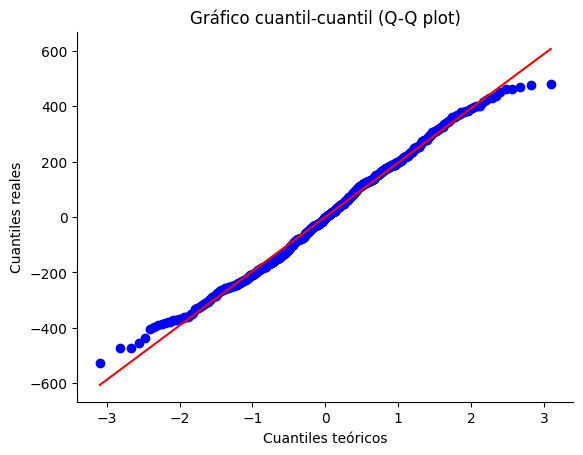

In [22]:
stats.probplot(residuales, dist="norm", plot=plt)
plt.title('Gráfico cuantil-cuantil (Q-Q plot)')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles reales')

# Quitar las líneas superior y derecha del marco
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False) # superior

In [23]:
#Homocedasticidad
# Test de Breuschpagan para la homoscedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

exog = sm.add_constant(X)  # Agregar el intercepto
bp_test = het_breuschpagan(residuales, exog)

print(f"Estadístico de Breusch-Pagan: {bp_test[0]: 0.4f}")
print(f"p-valor de Breusch-Pagan: {bp_test[1]: 0.4f}")

# Interpretación: Si el p-valor es mayor que 0.05, hay homoscedasticidad.
if bp_test[1] > 0.10:
    print("No se rechaza la homoscedasticidad (la varianza de los residuales es constante).")
else:
    print("Se rechaza la homoscedasticidad (hay heteroscedasticidad).")

Estadístico de Breusch-Pagan:  24.9771
p-valor de Breusch-Pagan:  0.0000
Se rechaza la homoscedasticidad (hay heteroscedasticidad).


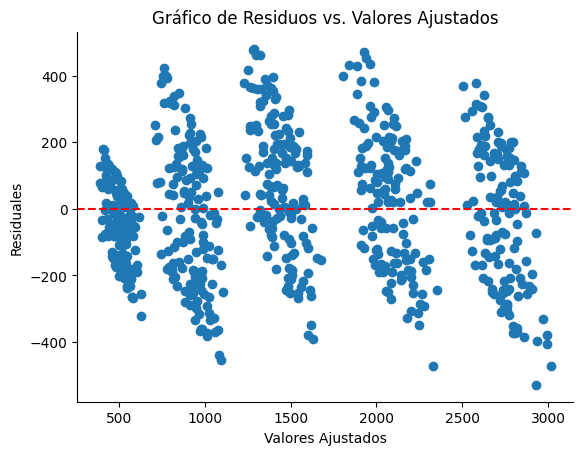

In [24]:
# Crear el gráfico de residuos vs. valores ajustados
plt.scatter(y_pred, residuales)
plt.axhline(0, color='red', linestyle='--')  # Línea horizontal en 0
plt.title('Gráfico de Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')

# Quitar las líneas superior y derecha del marco
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False) # superior

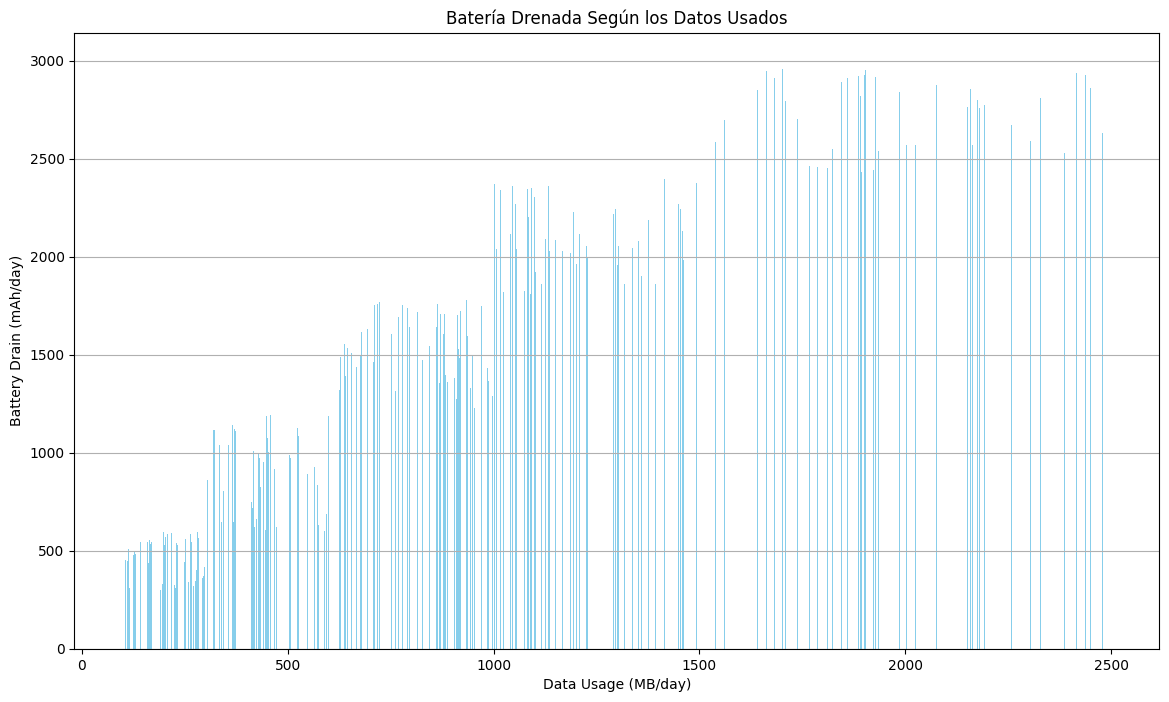

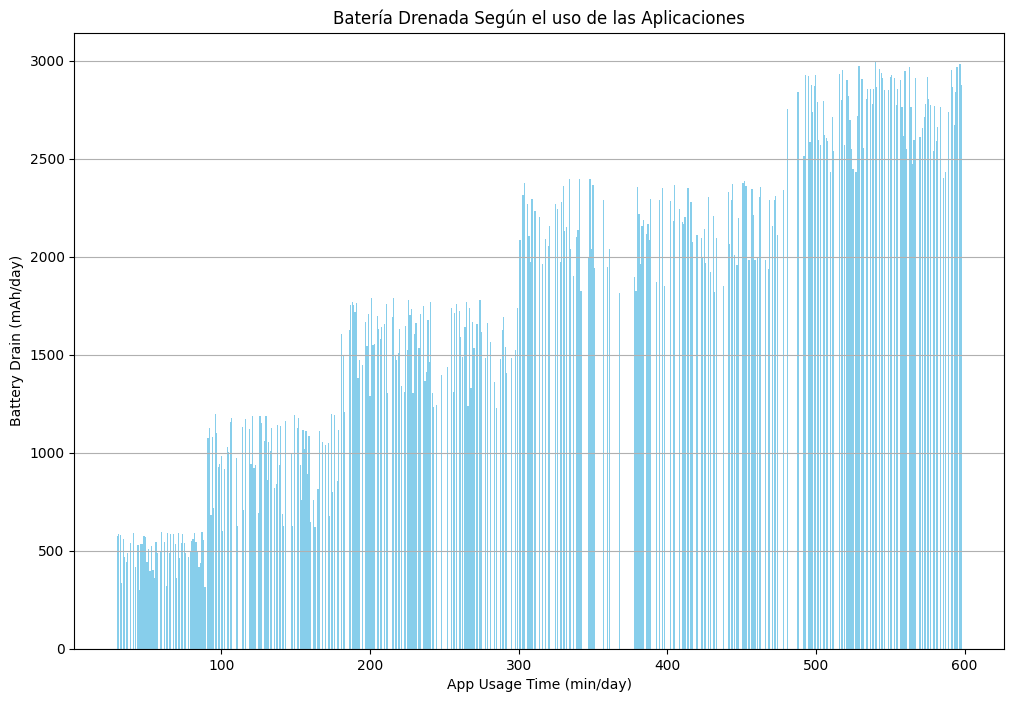

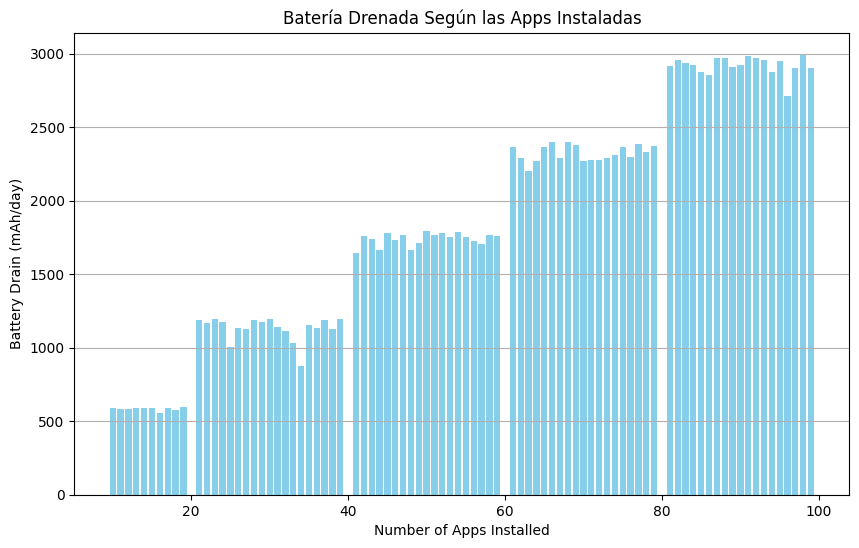

In [25]:
# Crear un gráfico de barras
plt.figure(figsize=(14, 8))  # Ajustar el tamaño de la figura
plt.bar(df['Data Usage (MB/day)'], df['Battery Drain (mAh/day)'], color='skyblue')
plt.title('Batería Drenada Según los Datos Usados')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.grid(axis='y')  # Agregar una cuadrícula horizontal
plt.show() #Mostrar el Gráfico# Crear un gráfico de barras
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
plt.bar(df['App Usage Time (min/day)'], df['Battery Drain (mAh/day)'], color='skyblue')
plt.title('Batería Drenada Según el uso de las Aplicaciones')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.grid(axis='y')  # Agregar una cuadrícula horizontal
plt.show() #Mostrar el Gráfico
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.bar(df['Number of Apps Installed'], df['Battery Drain (mAh/day)'], color='skyblue')
plt.title('Batería Drenada Según las Apps Instaladas')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Battery Drain (mAh/day)')
plt.grid(axis='y')  # Agregar una cuadrícula horizontal
plt.show() #Mostrar el Gráfico

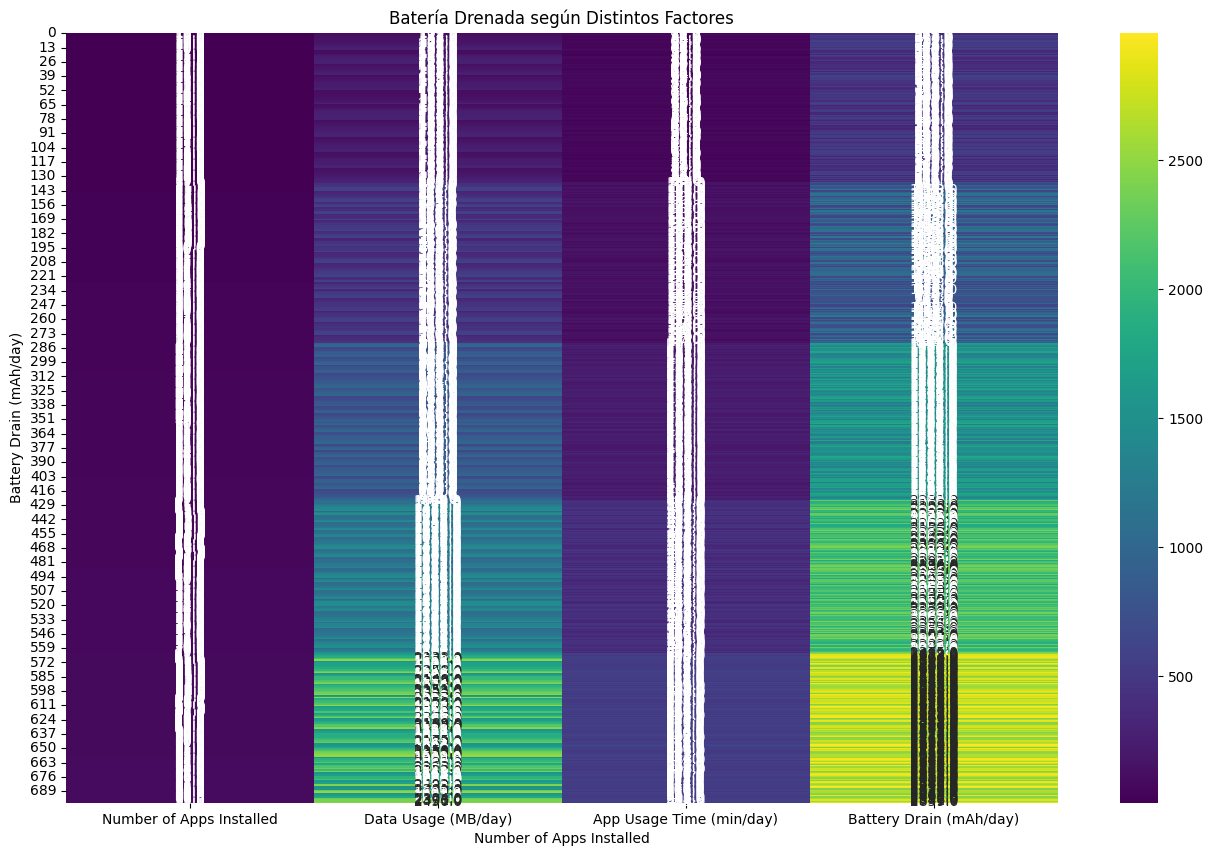

In [26]:
#Datos
heatmap_data = df.groupby(['Number of Apps Installed','Data Usage (MB/day)','App Usage Time (min/day)'])['Battery Drain (mAh/day)'].mean().reset_index()

#Crear Matriz
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f")
plt.title('Batería Drenada según Distintos Factores')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()